<a href="https://colab.research.google.com/github/suraj-sharma-chennai/Hospital-Management-data-analysis/blob/main/Hospital_Management_data_anaylsis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
# Specify the path to your CSV file
file_path = '/content/drive/MyDrive/appointments.csv'


In [5]:
#loading other all files
patient = pd.read_csv('/content/drive/MyDrive/patients.csv')
doctor=pd.read_csv('/content/drive/MyDrive/doctors.csv')
treatment=pd.read_csv('/content/drive/MyDrive/treatments.csv')
billing=pd.read_csv('/content/drive/MyDrive/billing.csv')

In [6]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)


In [7]:
#first five rows
df.head()

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show


In [ ]:
# list of all columns
df.columns

Index(['appointment_id', 'patient_id', 'doctor_id', 'appointment_date',
       'appointment_time', 'reason_for_visit', 'status'],
      dtype='object')

In [ ]:
#checking  null values is there or not  in columns of data set
df.isnull().sum()

,0
appointment_id,0
patient_id,0
doctor_id,0
appointment_date,0
appointment_time,0
reason_for_visit,0
status,0


In [ ]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appointment_id    200 non-null    object
 1   patient_id        200 non-null    object
 2   doctor_id         200 non-null    object
 3   appointment_date  200 non-null    object
 4   appointment_time  200 non-null    object
 5   reason_for_visit  200 non-null    object
 6   status            200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB


In [ ]:
#basic describtion of dataset
df.describe()

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status
count,200,200,200,200,200,200,200
unique,200,48,10,158,40,5,4
top,A001,P012,D005,2023-08-16,11:00:00,Checkup,No-show
freq,1,10,29,5,9,45,52


In [ ]:
#bottom 5 rows
df.tail()

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status
195,A196,P045,D006,2023-10-26,9:45:00,Checkup,Cancelled
196,A197,P001,D005,2023-04-01,13:30:00,Emergency,No-show
197,A198,P022,D006,2023-05-15,8:30:00,Therapy,No-show
198,A199,P017,D001,2023-05-01,12:45:00,Follow-up,Completed
199,A200,P007,D005,2023-12-30,10:15:00,Consultation,Cancelled


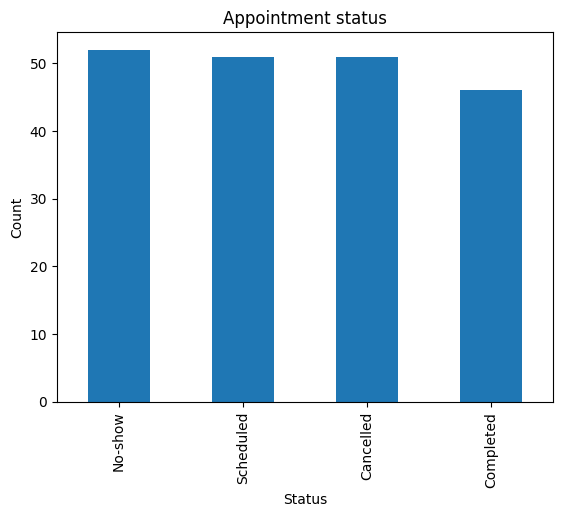

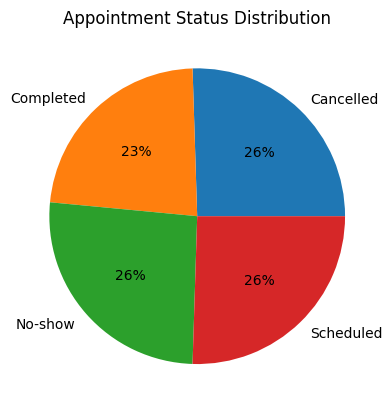

In [ ]:
#visualization of   the  appointment status using  bar chart
df['status'].value_counts().plot(kind='bar',title='Appointment status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# pie chart : percentage distribution
df.groupby('status').size().plot(kind='pie',autopct='%1.0f%%',title='Appointment Status Distribution')
plt.xlabel('')
plt.ylabel('')
plt.show()

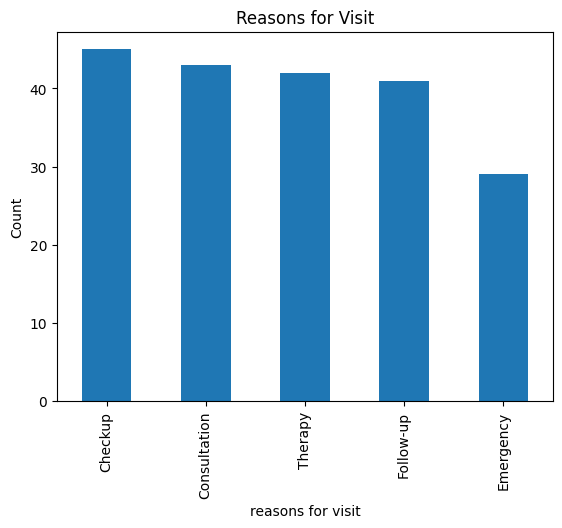

In [ ]:
#Total  count of 'reason for visit' column  in dataset
df['reason_for_visit'].value_counts().plot(kind='bar',title='Reasons for Visit')
plt.xlabel('reasons for visit')
plt.ylabel('Count')
plt.show()


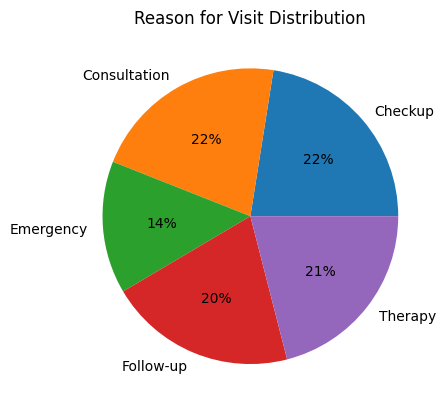

In [ ]:
#percentage distribution for  'reason for visit' column  in dataset
df.groupby('reason_for_visit').size().plot(kind='pie',autopct='%1.0f%%',title='Reason for Visit Distribution')
plt.xlabel('')
plt.ylabel('')
plt.show()

<Axes: xlabel='doctor_id'>

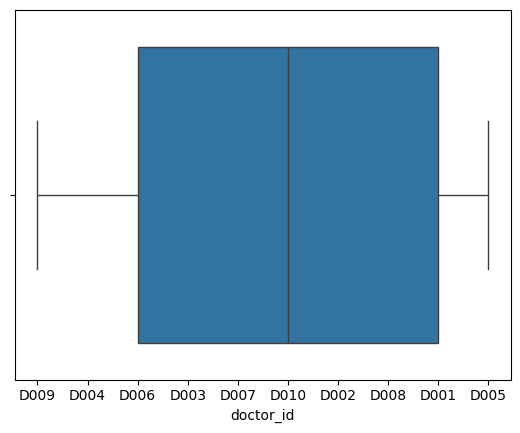

In [ ]:
# to check the  outliers.
sb.boxplot(x='doctor_id',data=df)

In [ ]:
treatment.head()

,treatment_id,appointment_id,treatment_type,description,cost,treatment_date
0,T001,A001,Chemotherapy,Basic screening,3941.97,2023-08-09
1,T002,A002,MRI,Advanced protocol,4158.44,2023-06-09
2,T003,A003,MRI,Standard procedure,3731.55,2023-06-28
3,T004,A004,MRI,Basic screening,4799.86,2023-09-01
4,T005,A005,ECG,Standard procedure,582.05,2023-07-06


In [ ]:
treatment.shape

(200, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

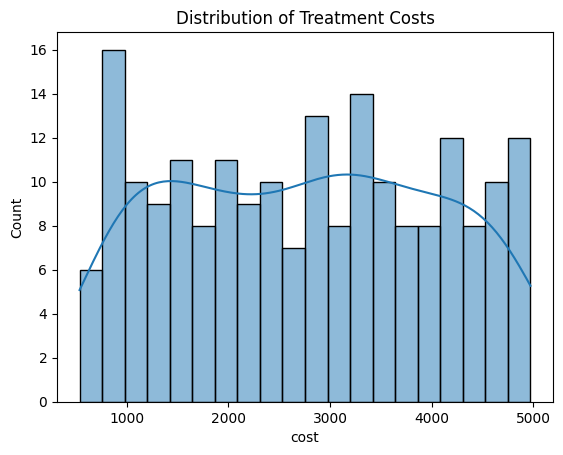

In [8]:
sb.histplot(treatment['cost'] ,bins=20, kde=True)
plt.title('Distribution of Treatment Costs')
plt.show

In [ ]:
billing.head()

,bill_id,patient_id,treatment_id,bill_date,amount,payment_method,payment_status
0,B001,P034,T001,2023-08-09,3941.97,Insurance,Pending
1,B002,P032,T002,2023-06-09,4158.44,Insurance,Paid
2,B003,P048,T003,2023-06-28,3731.55,Insurance,Paid
3,B004,P025,T004,2023-09-01,4799.86,Insurance,Failed
4,B005,P040,T005,2023-07-06,582.05,Credit Card,Pending


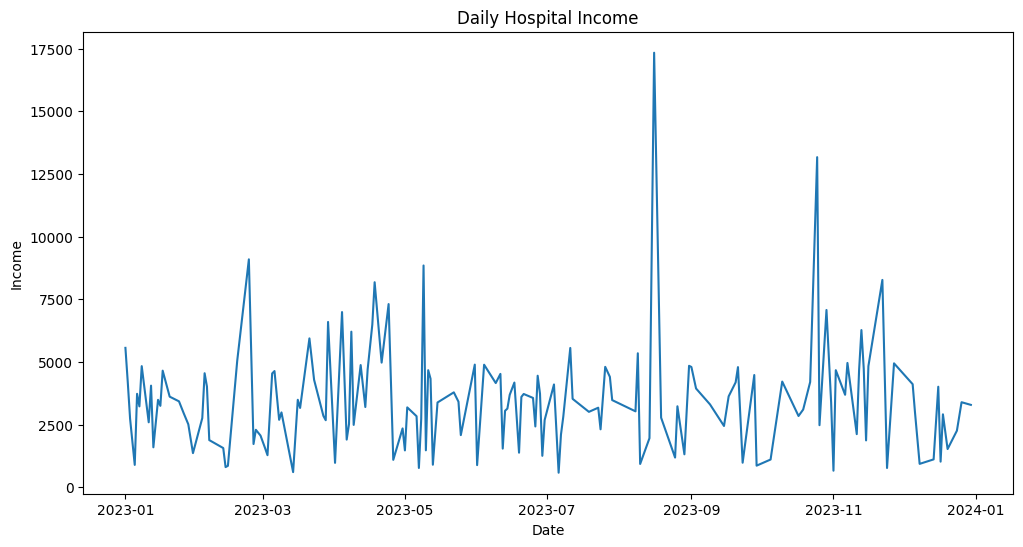

In [ ]:
merged = df.merge(treatment, on='appointment_id').merge(billing, on='treatment_id')

# Convert 'bill_date' to datetime objects
merged['bill_date'] = pd.to_datetime(merged['bill_date'])

daily_income = merged.groupby(merged['bill_date'].dt.date)['amount'].sum()
daily_income.plot(figsize=(12,6), title='Daily Hospital Income')
plt.xlabel('Date')
plt.ylabel('Income')
plt.show()

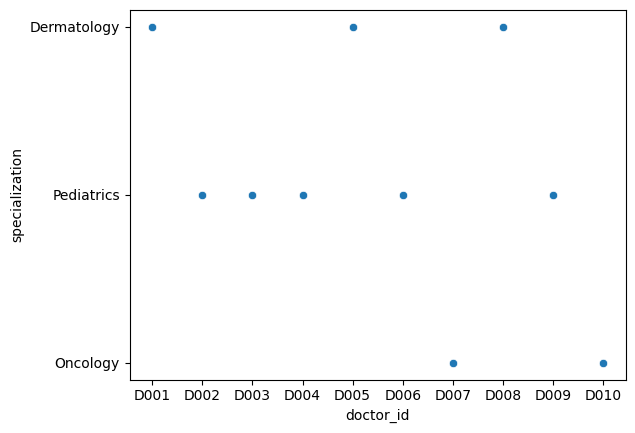

In [9]:
#scatterplot ofc doctor  in term of dcotor id and  specialization
sb.scatterplot(x='doctor_id',y='specialization',data=doctor)
plt.show()

In [ ]:
billing.head()

,bill_id,patient_id,treatment_id,bill_date,amount,payment_method,payment_status
0,B001,P034,T001,2023-08-09,3941.97,Insurance,Pending
1,B002,P032,T002,2023-06-09,4158.44,Insurance,Paid
2,B003,P048,T003,2023-06-28,3731.55,Insurance,Paid
3,B004,P025,T004,2023-09-01,4799.86,Insurance,Failed
4,B005,P040,T005,2023-07-06,582.05,Credit Card,Pending


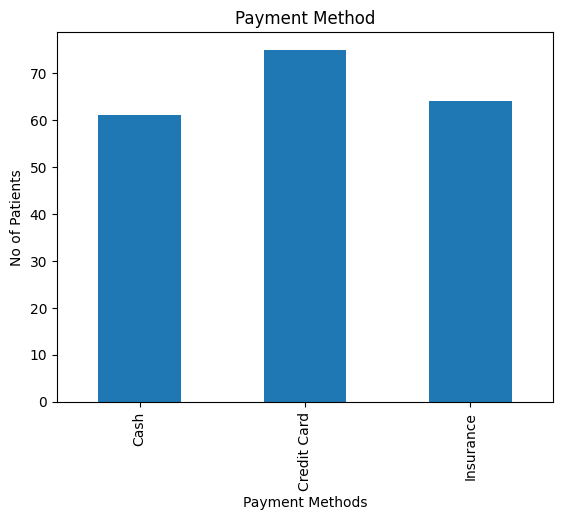

In [ ]:
#showing the  visualization between payment methods and no of patients
billing.groupby('payment_method').size().plot(kind='bar', title='Payment Method')
plt.xlabel('Payment Methods')
plt.ylabel('No of Patients')
plt.show()


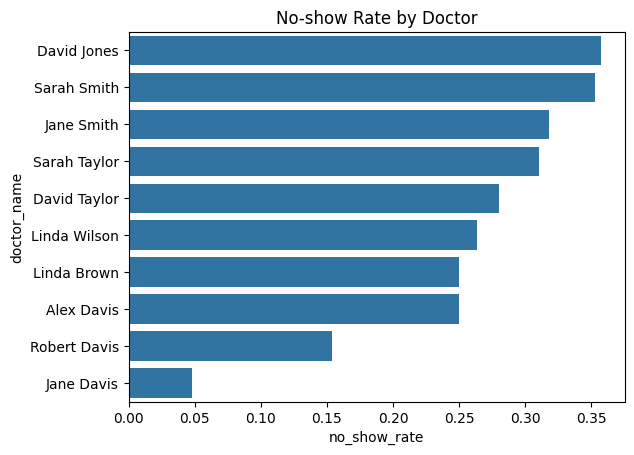

In [ ]:
#visualization of the  no show rate by the doctors .
no_show_rate = df[df['status'] == 'No-show'].groupby('doctor_id').size().reset_index(name='no_shows')
total_appointments = df.groupby('doctor_id').size().reset_index(name='total')

no_show_data = no_show_rate.merge(total_appointments, on='doctor_id')
no_show_data['no_show_rate'] = no_show_data['no_shows'] / no_show_data['total']

no_show_data = no_show_data.merge(doctor[['doctor_id','first_name','last_name']], on='doctor_id')
no_show_data['doctor_name'] = no_show_data['first_name'] + ' ' + no_show_data['last_name']
no_show_data = no_show_data.sort_values(by='no_show_rate', ascending=False)

sb.barplot(data=no_show_data, x='no_show_rate', y='doctor_name')
plt.title('No-show Rate by Doctor')
plt.show()

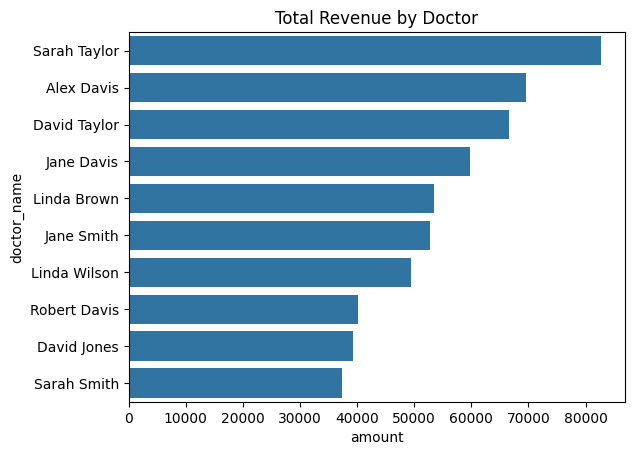

In [ ]:
#visualization of the  revenue generated by doctor in hospital
doctor_treatment = merged.groupby('doctor_id')['amount'].sum().reset_index()
doctor_treatment = doctor_treatment.merge(doctor[['doctor_id','first_name','last_name']], on='doctor_id')
doctor_treatment['doctor_name'] = doctor_treatment['first_name'] + ' ' + doctor_treatment['last_name']
doctor_treatment = doctor_treatment.sort_values(by='amount', ascending=False)

sb.barplot(data=doctor_treatment, x='amount', y='doctor_name')
plt.title('Total Revenue by Doctor')
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
